In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Leer imagen
image = cv2.imread("../0.data/Images/man_suit.jpg") # almacena imagenes en formato UINT8

In [3]:
image.shape

(3072, 2048, 3)

In [4]:
# obtener los canales, openCV lo trata como BGR
b = image[:,:,0] # imagen b/n
g = image[:,:,1] # green
r = image[:,:,2] # red

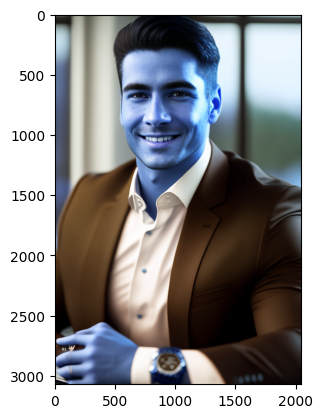

In [5]:
plt.imshow(image) # mostrar imagen con matplotlib

In [6]:
# mostrar imagen con openCV
cv2.imshow("",image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
# mostrar imagen con openCV
cv2.imshow("",b)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
# mostrar imagen con openCV
cv2.imshow("",g)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
# mostrar imagen con openCV
cv2.imshow("",r)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
# hallar la intensidad de una imgen
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

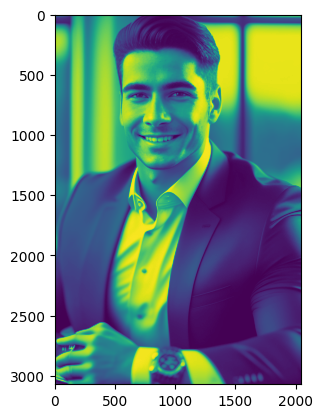

In [11]:
plt.imshow(img_gray)

In [12]:
# imagen binaria 0 - 255

# 1ero filtrar mayores a intensidad 100(valor opcional) retornara true lo q cumpla y false lo q no (eso se convertira en blanco o negro)
# 2do volverlo a convertir a imagen multiplicando por 255
# con np establecemos que sera una img de 8 bits
binaria = np.uint8(255*(img_gray > 100))


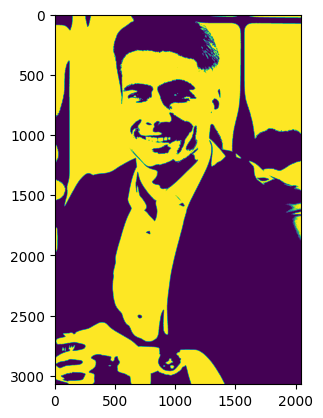

In [13]:
plt.imshow(binaria)

In [14]:
# mostrar imagen binaria con openCV
cv2.imshow("",binaria)
cv2.waitKey(0)
cv2.destroyAllWindows()

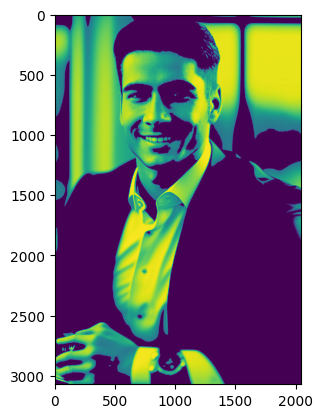

In [15]:
#  Operaciones entre imagenes
# Objeto segmentado sobre la escala de grises
gray_segmentada = np.uint8(img_gray*(binaria/255))
plt.imshow(gray_segmentada)

In [16]:
# usando la mascara binaria
seg_color = image.copy()
seg_color[:,:,0] = np.uint8(b*(binaria/255))
seg_color[:,:,1] = np.uint8(g*(binaria/255))
seg_color[:,:,2] = np.uint8(r*(binaria/255))

In [17]:
# mostrar imagen
cv2.imshow("", seg_color)
cv2.waitKey(0)
cv2.destroyAllWindows()

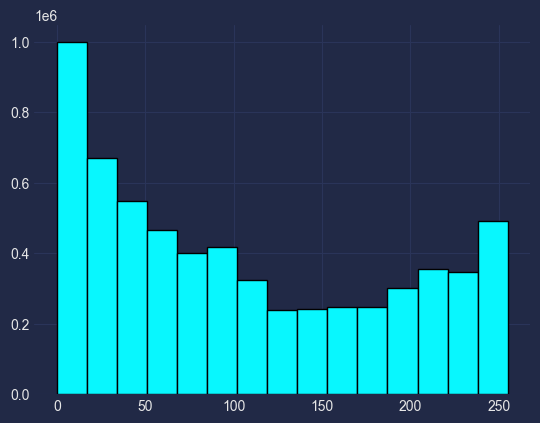

In [21]:
import mplcyberpunk

plt.style.use("cyberpunk")
plt.hist(img_gray.flatten(), bins=15, edgecolor = "black")
mplcyberpunk.add_glow_effects()
plt.show()

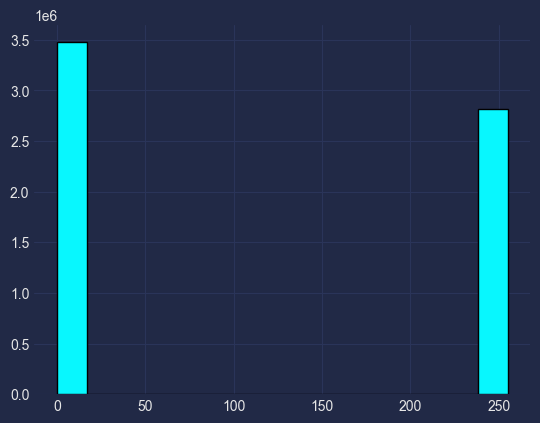

In [22]:
plt.hist(binaria.flatten(), bins=15, edgecolor = "black")
#mplcyberpunk.add_glow_effects()
plt.show()

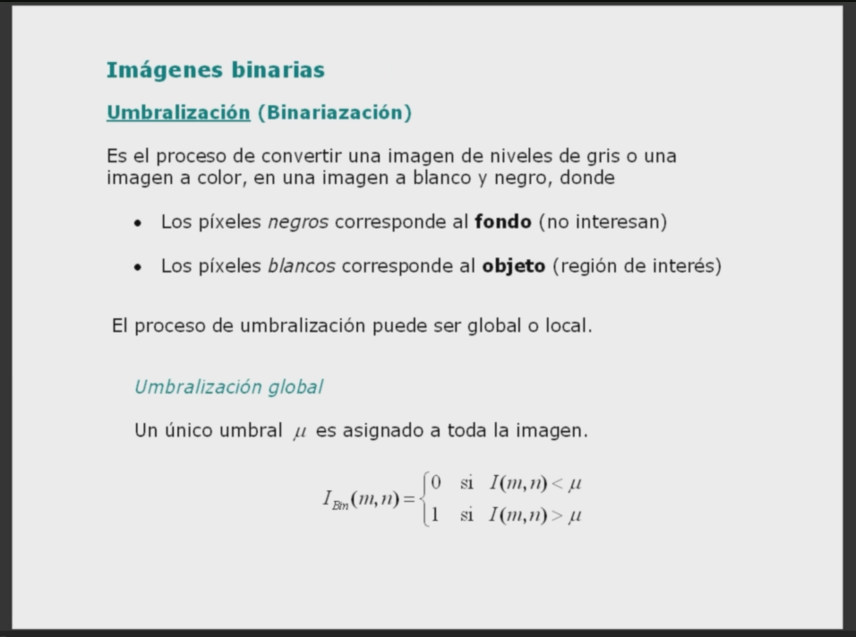

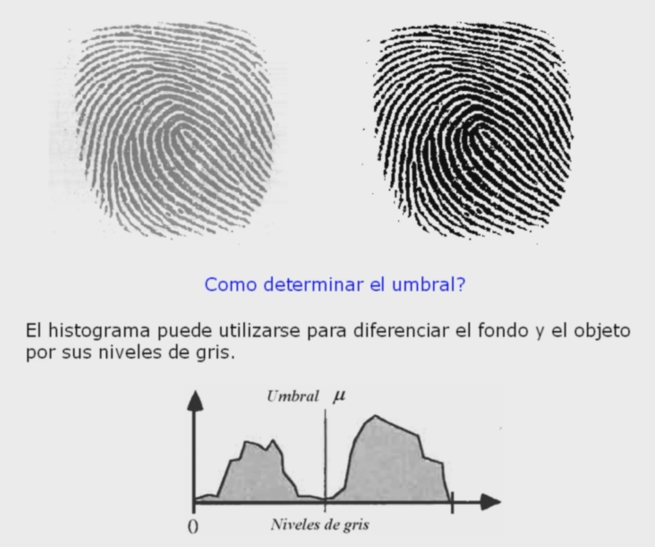

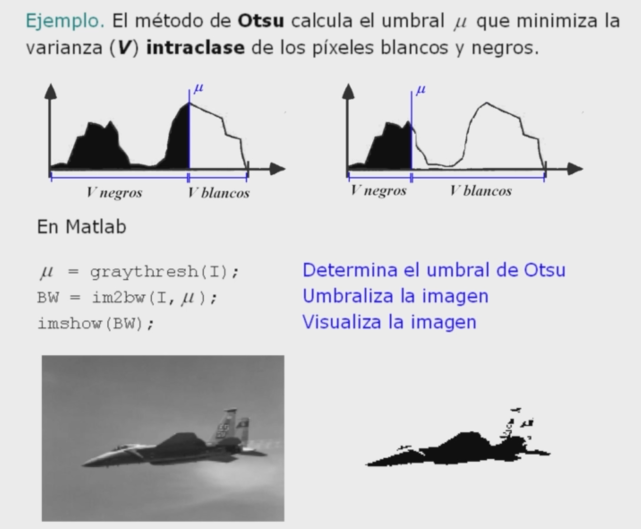

In [28]:
th_outsu,_ = cv2.threshold(img_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU) # calcula el threshhold optimo y luego hacemos la comparacion
th_outsu

122.0

In [30]:
binaria_outsu = np.uint8(255*(img_gray<th_outsu))
binaria_outsu

array([[255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

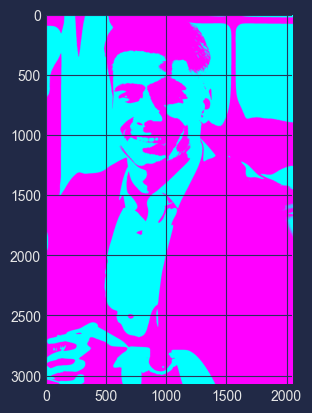

In [31]:
plt.imshow(binaria_outsu)

## Lunar

In [59]:
# Leer imagen
lunar = cv2.imread("../0.data/Images/000078.jpg") # almacena imagenes en formato UINT8

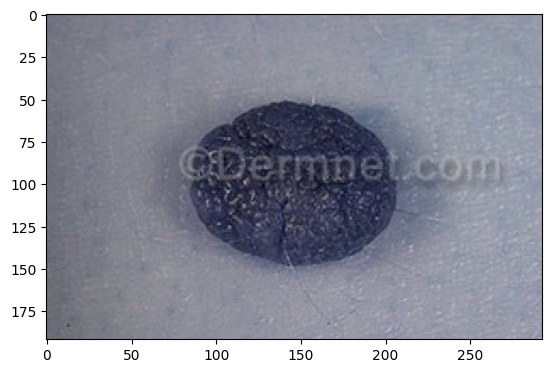

In [60]:
plt.imshow(lunar)

Pasar a escala de grises

In [61]:
lunar_gray = cv2.cvtColor(lunar, cv2.COLOR_BGR2GRAY)

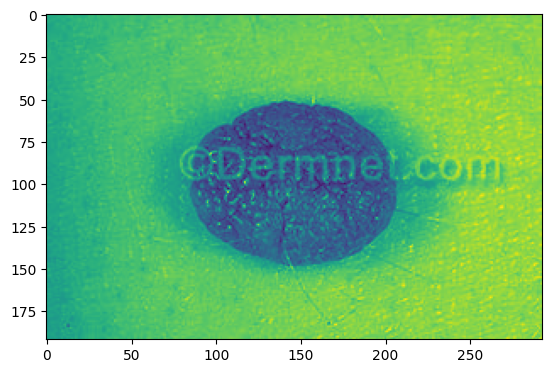

In [63]:
plt.imshow(lunar_gray)

usando outsu para binarizacion o el umbral

In [67]:
# Extraer todos los valores que sea menor al th_lunar_outsu
# porque blanco es lo mas alto que se puede obtener 255
# y lo demas es bajo, por lo que nos interesa los de menor valor
th_lunar_outsu,_ = cv2.threshold(lunar_gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU) # calcula el threshhold optimo y luego hacemos la comparacion
lunar_outsu = np.uint8(255*(lunar_gray < th_lunar_outsu))

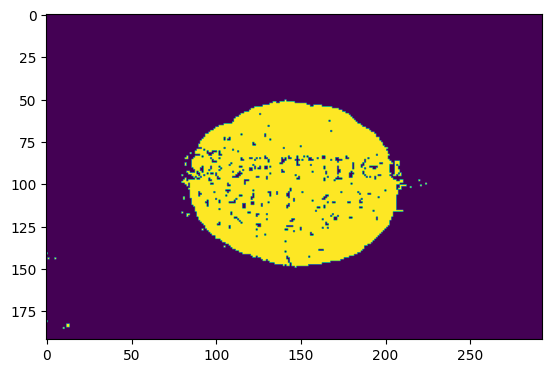

In [68]:
plt.imshow(lunar_outsu)

Operacion de CONVOLUCION EN 2D

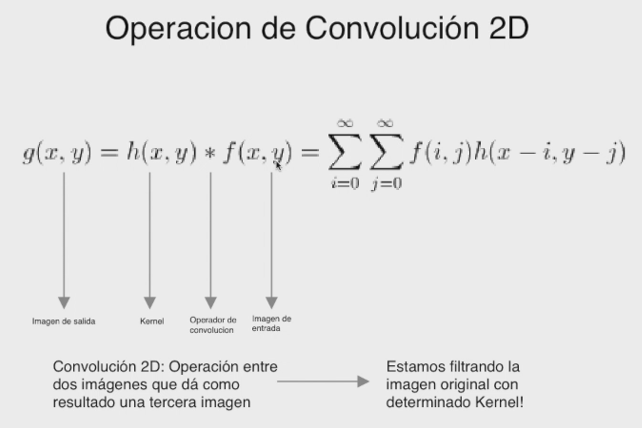

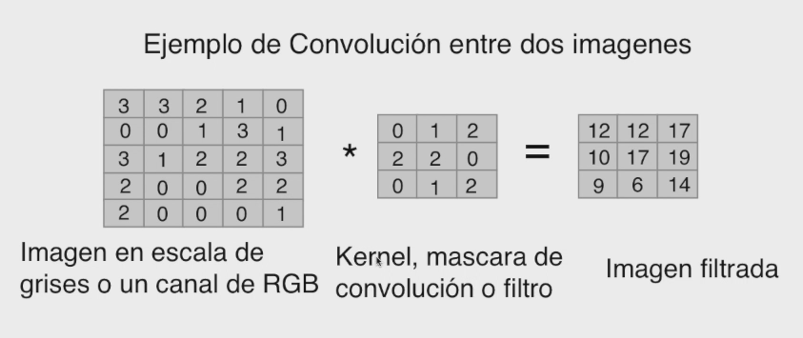

## IMPLEMENTAION DE FILTROS

FILTRO GAUSSIANO

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# leer la imagen
manzanas = cv2.imread("../0.data/Images/manzanas.jpg")

In [14]:
cv2.imshow("Original",manzanas)
cv2.waitKey(0)
cv2.destroyAllWindows()

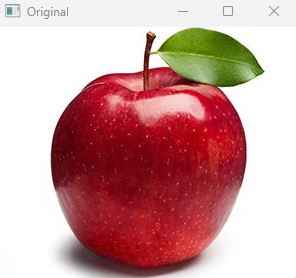

filtro de 3x3

In [15]:
# crear el filtro
kernel_3x3 = np.ones((3,3))/(3*3) # crear una matriz de 3x3 que contenga 1 y la dividimos entre 3x3 para no modificar la intensidad
# todo sumado y dividido entre 9 = 1 lo cual no afecta
output_3x3 = cv2.filter2D(manzanas, -1,kernel_3x3) # hasta aqui se esta creando la imagen filtrada

In [16]:
cv2.imshow("Filtro de 3x3",output_3x3)
cv2.waitKey(0)
cv2.destroyAllWindows()

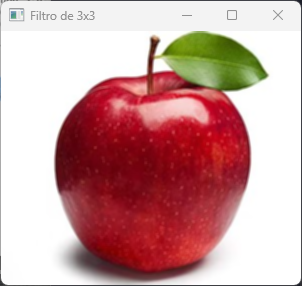

filtro de 11x11 impar para poder obtener el pixel de la mitad

In [17]:
# crear el filtro
kernel_11x11 = np.ones((11,11))/(11*11) # crear una matriz de 3x3 que contenga 1 y la dividimos entre 3x3 para no modificar la intensidad
# todo sumado y dividido entre 9 = 1 lo cual no afecta
output_11x11 = cv2.filter2D(manzanas, -1,kernel_11x11) # hasta aqui se esta creando la imagen filtrada

In [18]:
cv2.imshow("Filtro de 11x11",output_11x11)
cv2.waitKey(0)
cv2.destroyAllWindows()

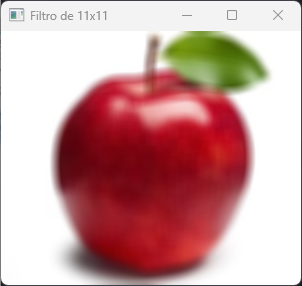

filtro de 31x31

In [19]:
# crear el filtro
kernel_31x31 = np.ones((31,31))/(31*31) # crear una matriz de 3x3 que contenga 1 y la dividimos entre 3x3 para no modificar la intensidad
# todo sumado y dividido entre 9 = 1 lo cual no afecta
output_31x31 = cv2.filter2D(manzanas, -1,kernel_31x31) # hasta aqui se esta creando la imagen filtrada

In [20]:
cv2.imshow("Filtro de 31x31",output_31x31)
cv2.waitKey(0)
cv2.destroyAllWindows()

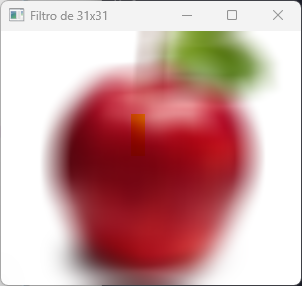

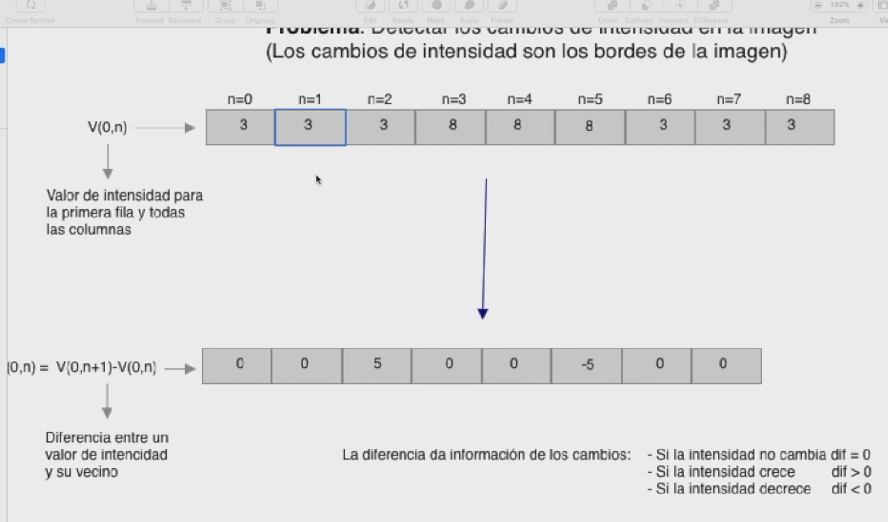

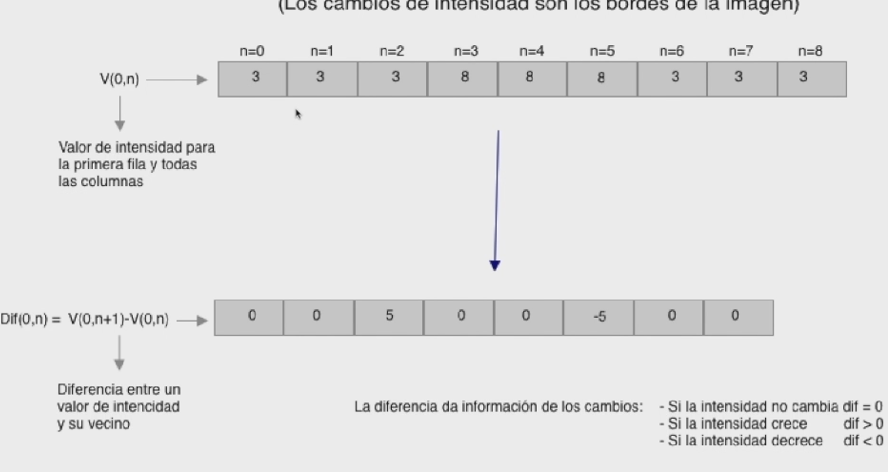

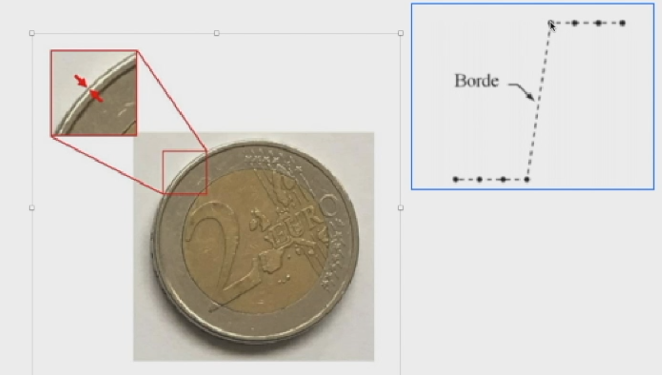

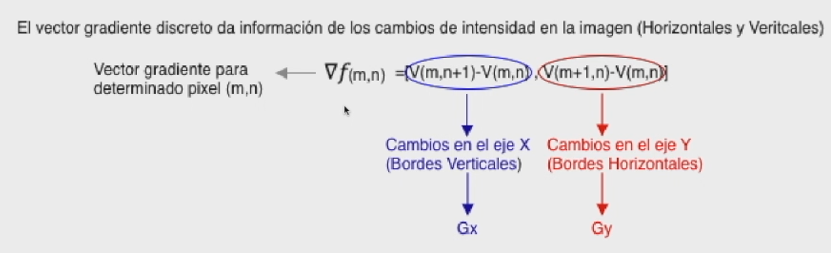

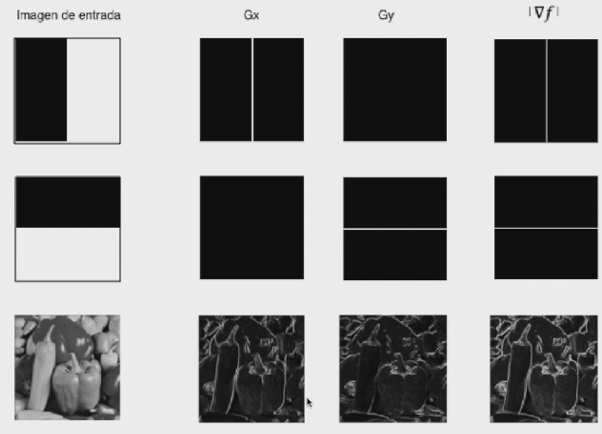

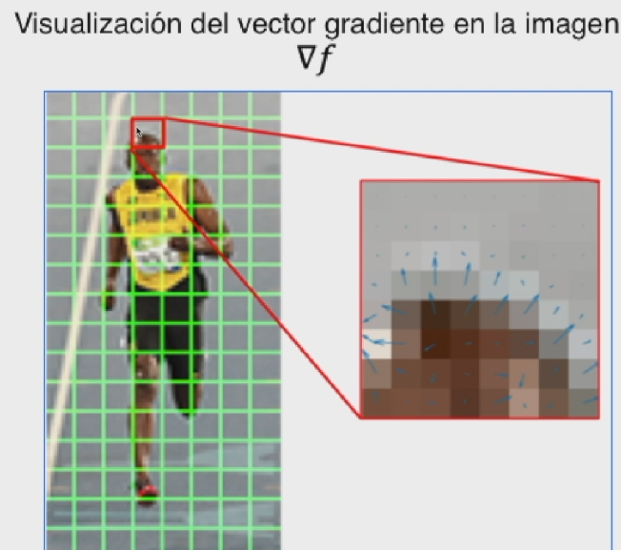

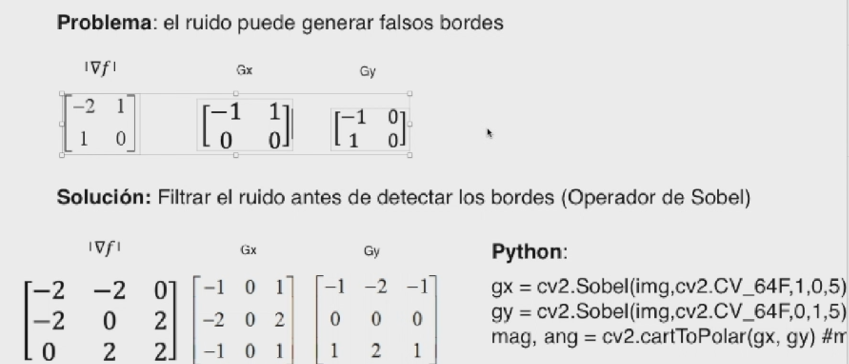

### Calculando el vector gradiente

In [21]:
manzanas_gray = cv2.cvtColor(manzanas,cv2.COLOR_RGB2GRAY) # escala de grises

In [23]:
# calculando Gx y Gy
gx = cv2.Sobel(manzanas_gray, cv2.CV_64F, 1, 0, 5) # flotante de 64  ,1,0 -> en direccion de las column con kernel tamaño 5
gy = cv2.Sobel(manzanas_gray, cv2.CV_64F, 0, 1, 5) # 0,1 -> en direccion de las filas

In [30]:
mag,_=cv2.cartToPolar(gx,gy)

visualizando resultados

gx

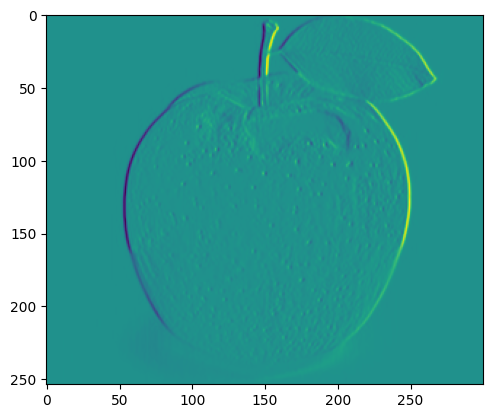

In [26]:
plt.imshow(gx)

gy

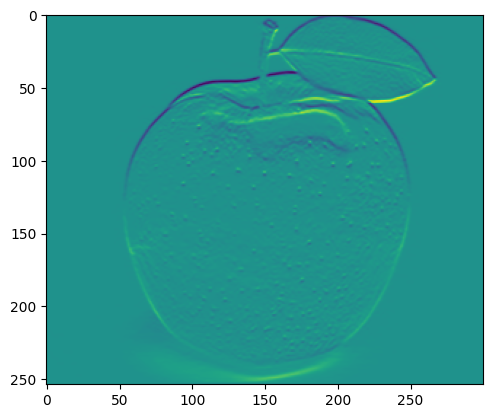

In [27]:
plt.imshow(gy)

Magnitud tanto cambios horz y verticales

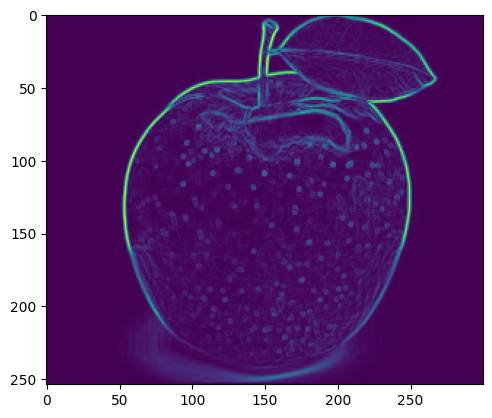

In [25]:
plt.imshow(mag)

In [34]:
print(np.max(mag))
print(np.min(mag))

982.2932352408826
0.0


In [35]:
# dividirlo sobre el max valor de si mismo, porque el valor max de la magnitud supera los 255
mag = np.uint8(255*(mag/np.max(mag))) # y ponerlo como entero

In [36]:
print(np.max(mag))
print(np.min(mag))

255
0


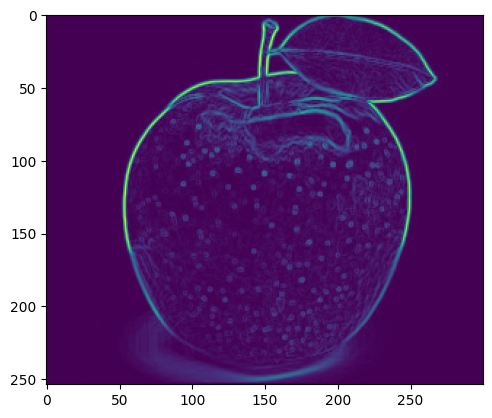

In [29]:
plt.imshow(mag)